In [3]:
import pandas as pd
# import numpy as np 

In [4]:
import numpy as np 

In [6]:
DATA_PATH = r"D:\MLOps\Heart Attack.csv"
data = pd.read_csv(DATA_PATH)
print("Loaded dataset:", DATA_PATH)


Loaded dataset: D:\MLOps\Heart Attack.csv


In [7]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [9]:
data.head(20)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.800,0.012,negative
1,21,1,94,98,46,296.0,6.750,1.060,positive
2,55,1,64,160,77,270.0,1.990,0.003,negative
3,64,1,70,120,55,270.0,13.870,0.122,positive
4,55,1,64,112,65,300.0,1.080,0.003,negative
5,58,0,61,112,58,87.0,1.830,0.004,negative
6,32,0,40,179,68,102.0,0.710,0.003,negative
7,63,1,60,214,82,87.0,300.000,2.370,positive
8,44,0,60,154,81,135.0,2.350,0.004,negative
9,67,1,61,160,95,100.0,2.840,0.011,negative


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


In [14]:
missing = data.isnull().sum()
missing_pct = (missing / len(data) * 100).round(2)
miss_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
miss_df

,missing_count,missing_pct
age,0,0.0
gender,0,0.0
impluse,0,0.0
pressurehight,0,0.0
pressurelow,0,0.0
glucose,0,0.0
kcm,0,0.0
troponin,0,0.0
class,0,0.0


In [15]:
x = data.drop('class',axis =1)
x

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [16]:
y = data['class']
y

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: class, Length: 1319, dtype: object

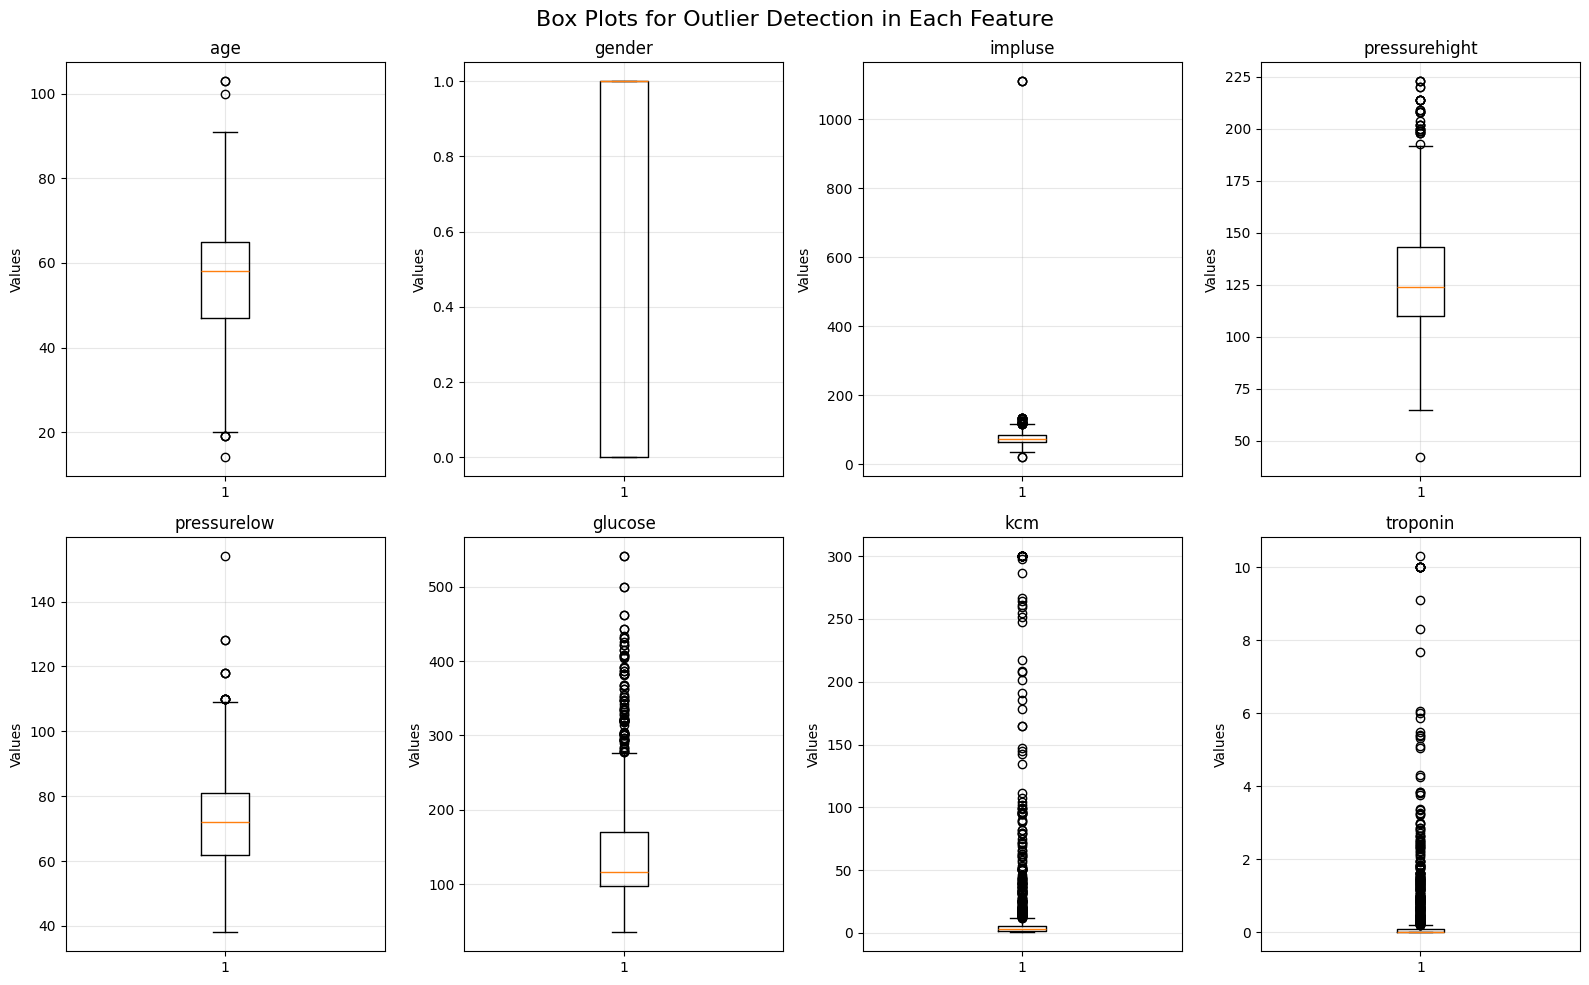

In [18]:
#checking outliers
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you've already separated your features (X) from the target
x = data.drop('class',axis =1)
# Create subplots for each feature
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('Box Plots for Outlier Detection in Each Feature', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create box plot for each feature
for i, column in enumerate(x.columns):
    axes[i].boxplot(x[column].dropna())
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('Values')
    axes[i].grid(True, alpha=0.3)

# Hide empty subplots if any
for j in range(len(x.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [21]:
data.columns.unique()

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [25]:
import pandas as pd
import numpy as np

def identify_feature_types(data):
    categorical_cols = []
    continuous_cols = []
    
    for col in data.columns:
        # Check data type first
        if pd.api.types.is_categorical_dtype(data[col]) or pd.api.types.is_object_dtype(data[col]):
            categorical_cols.append(col)
        
        # For integer columns, check number of unique values
        elif pd.api.types.is_integer_dtype(data[col]):
            unique_values = data[col].nunique()
            # If less than 10 unique values, likely categorical
            if unique_values <= 10:
                categorical_cols.append(col)
            else:
                continuous_cols.append(col)
        
        # Float columns are typically continuous
        elif pd.api.types.is_numeric_dtype(data[col]):
            continuous_cols.append(col)
        
        else:
            # Default to continuous if uncertain
            continuous_cols.append(col)
    
    return categorical_cols, continuous_cols

# Apply to your dataset
categorical_features, continuous_features = identify_feature_types(x)

print("Categorical Features:")
print(categorical_features)
print(f"\nContinuous Features:")
print(continuous_features)


Categorical Features:
['gender']

Continuous Features:
['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11924\851311935.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data[col]) or pd.api.types.is_object_dtype(data[col]):


In [27]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X (features) and y (target 'class')
# X contains: age, gender, impulse, pressurehight, pressurelow, glucose, kcm, troponin

# Step 1: Identify which features are categorical
# From your dataset, 'gender' is likely categorical (0/1), others are continuous
# categorical_features = [1]  # Index 1 is 'gender' (if gender is 2nd column)
# OR specify by boolean mask
discrete_mask = [False, True, False, False, False, False, False, False]  # gender is categorical

# Step 2: Calculate mutual information
mi_scores = mutual_info_classif(
    x, y, 
    discrete_features=discrete_mask,  # Specify which features are categorical
    random_state=42
)

# Step 3: Create results DataFrame
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'mutual_info_score': mi_scores
}).sort_values('mutual_info_score', ascending=False)

print("Feature Importance (Mutual Information):")
print(feature_importance)


Feature Importance (Mutual Information):
         feature  mutual_info_score
7       troponin           0.387429
6            kcm           0.123059
0            age           0.017737
4    pressurelow           0.016682
3  pressurehight           0.015362
5        glucose           0.004978
1         gender           0.004426
2        impluse           0.000000


In [31]:
# Remove low-information features
features_to_remove = ["impluse"]
x = x.drop(columns=features_to_remove)


print(f"Features kept: {list(x.columns)}")


Features kept: ['age', 'gender', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


In [32]:
x

,age,gender,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,160,83,160.0,1.80,0.012
1,21,1,98,46,296.0,6.75,1.060
2,55,1,160,77,270.0,1.99,0.003
3,64,1,120,55,270.0,13.87,0.122
4,55,1,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...
1314,44,1,122,67,204.0,1.63,0.006
1315,66,1,125,55,149.0,1.33,0.172
1316,45,1,168,104,96.0,1.24,4.250
1317,54,1,117,68,443.0,5.80,0.359


In [39]:
y

array([0, 1, 0, ..., 1, 1, 1], shape=(1319,))

In [46]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)  # This returns a numpy array

# Show the mapping
print("Label Encoding Results:")
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  '{class_name}' -> {i}")




Label Encoding Results:
Original classes: [0 1]
Encoded mapping:
  '0' -> 0
  '1' -> 1


In [47]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Length: 1319, dtype: int64

In [48]:
# Reset index and drop the old index column
x = x.reset_index(drop=True)


x

,age,gender,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,160,83,160.0,1.80,0.012
1,21,1,98,46,296.0,6.75,1.060
2,55,1,160,77,270.0,1.99,0.003
3,64,1,120,55,270.0,13.87,0.122
4,55,1,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...
1314,44,1,122,67,204.0,1.63,0.006
1315,66,1,125,55,149.0,1.33,0.172
1316,45,1,168,104,96.0,1.24,4.250
1317,54,1,117,68,443.0,5.80,0.359


In [49]:
y= pd.Series(y).reset_index(drop=True)
y

0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Length: 1319, dtype: int64

In [50]:
#need to verfy the class distribution (to check whetehr there is imbalance or not)
# Verify class balance
import numpy as np

unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution:")
for class_val, count in class_distribution.items():
    percentage = (count / len(y)) * 100
    print(f"Class {class_val}: {count} samples ({percentage:.1f}%)")


Class Distribution:
Class 0: 509 samples (38.6%)
Class 1: 810 samples (61.4%)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
import pandas as pd
import numpy as np

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,
    stratify=y  # Maintain class distribution
)

# Second split: split remaining into train (64%) and validation (16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2,      # 20% of remaining 80% = 16% overall
    random_state=42,
    stratify=y_temp     # Maintain class distribution
)

# Verify split sizes
print("Dataset Split Information:")
print(f"Total dataset: {len(x)} samples")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(x)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(x)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(x)*100:.1f}%)")

# Check class distribution in each split
def check_class_distribution(y, split_name):
    unique, counts = np.unique(y, return_counts=True)
    print(f"\n{split_name} class distribution:")
    for class_val, count in zip(unique, counts):
        percentage = (count / len(y)) * 100
        print(f"  Class {class_val}: {count} samples ({percentage:.1f}%)")

check_class_distribution(y_train, "Training")
check_class_distribution(y_val, "Validation") 
check_class_distribution(y_test, "Test")


Dataset Split Information:
Total dataset: 1319 samples
Training set: 844 samples (64.0%)
Validation set: 211 samples (16.0%)
Test set: 264 samples (20.0%)

Training class distribution:
  Class 0: 326 samples (38.6%)
  Class 1: 518 samples (61.4%)

Validation class distribution:
  Class 0: 81 samples (38.4%)
  Class 1: 130 samples (61.6%)

Test class distribution:
  Class 0: 102 samples (38.6%)
  Class 1: 162 samples (61.4%)


In [54]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,              # Prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in leaf node
    random_state=42,
    class_weight='balanced',   # Handle mild class imbalance
    n_jobs=-1                  # Use all CPU cores
)

# Train the model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training completed!")

# Model information
print(f"\nModel Parameters:")
print(f"Number of estimators: {rf_model.n_estimators}")
print(f"Number of features used: {rf_model.n_features_in_}")
print(f"Feature names: {list(X_train.columns)}")


Training Random Forest model...
Training completed!

Model Parameters:
Number of estimators: 100
Number of features used: 7
Feature names: ['age', 'gender', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


In [55]:
# Make predictions on validation set
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)

# Calculate metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)

print("Validation Set Results:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Balanced Accuracy: {val_balanced_accuracy:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

# Create confusion matrix with labels
cm_df = pd.DataFrame(cm, 
                     index=['Actual Class 0', 'Actual Class 1'],
                     columns=['Predicted Class 0', 'Predicted Class 1'])
print(f"\nConfusion Matrix (Labeled):")
print(cm_df)


Validation Set Results:
Accuracy: 0.9905
Balanced Accuracy: 0.9923

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.98      0.99       130

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211


Confusion Matrix:
[[ 81   0]
 [  2 128]]

Confusion Matrix (Labeled):
                Predicted Class 0  Predicted Class 1
Actual Class 0                 81                  0
Actual Class 1                  2                128


Feature Importance Ranking:
         feature  importance
6       troponin    0.645850
5            kcm    0.246668
0            age    0.045420
4        glucose    0.021366
2  pressurehight    0.018002
3    pressurelow    0.017197
1         gender    0.005497

Feature Importance with Cumulative:
         feature  importance  cumulative_importance
6       troponin    0.645850               0.645850
5            kcm    0.246668               0.892518
0            age    0.045420               0.937938
4        glucose    0.021366               0.959304
2  pressurehight    0.018002               0.977306
3    pressurelow    0.017197               0.994503
1         gender    0.005497               1.000000


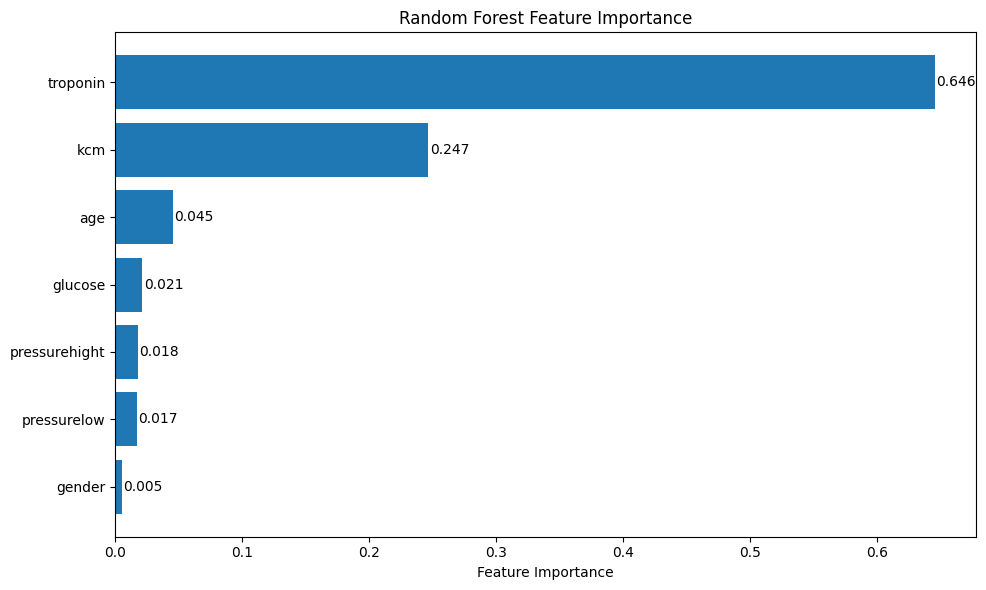

In [56]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
print(f"\nFeature Importance with Cumulative:")
print(feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()

# Add values on bars
for i, v in enumerate(feature_importance['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()


In [57]:
# Final evaluation on test set (use only once!)
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)

# Calculate final metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print("Final Test Set Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")

print("\nFinal Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nFinal Confusion Matrix:")
final_cm = confusion_matrix(y_test, y_test_pred)
final_cm_df = pd.DataFrame(final_cm,
                          index=['Actual Class 0', 'Actual Class 1'],
                          columns=['Predicted Class 0', 'Predicted Class 1'])
print(final_cm_df)


Final Test Set Results:
Test Accuracy: 0.9811
Test Balanced Accuracy: 0.9809

Final Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.99      0.98      0.98       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


Final Confusion Matrix:
                Predicted Class 0  Predicted Class 1
Actual Class 0                100                  2
Actual Class 1                  3                159


In [58]:
# Summary of all results
print("="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)

results_summary = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'Accuracy': [val_accuracy, test_accuracy],
    'Balanced_Accuracy': [val_balanced_accuracy, test_balanced_accuracy],
    'Samples': [len(y_val), len(y_test)]
})

print(results_summary)

# Calculate prediction confidence
test_confidence = np.max(y_test_proba, axis=1).mean()
print(f"\nAverage Prediction Confidence: {test_confidence:.4f}")

print(f"\nTop 3 Most Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")


MODEL PERFORMANCE SUMMARY
      Dataset  Accuracy  Balanced_Accuracy  Samples
0  Validation  0.990521           0.992308      211
1        Test  0.981061           0.980937      264

Average Prediction Confidence: 0.9494

Top 3 Most Important Features:
  troponin: 0.6458
  kcm: 0.2467
  age: 0.0454


In [61]:
import joblib
import os
from datetime import datetime

# Create a directory for your saved models
os.makedirs('saved_models', exist_ok=True)

# Save the trained Random Forest model
model_filename = 'saved_models/random_forest_medical_classifier.pkl'
joblib.dump(rf_model, model_filename)

# Save the label encoder (important for predictions)
encoder_filename = 'saved_models/label_encoder.pkl'
joblib.dump(label_encoder, encoder_filename)

# Save feature names for consistency
feature_names_filename = 'saved_models/feature_names.pkl'
joblib.dump(list(x.columns), feature_names_filename)

print("Model saved successfully!")
print(f"Model file: {model_filename}")
print(f"Encoder file: {encoder_filename}")
print(f"Features file: {feature_names_filename}")


Model saved successfully!
Model file: saved_models/random_forest_medical_classifier.pkl
Encoder file: saved_models/label_encoder.pkl
Features file: saved_models/feature_names.pkl


In [63]:
# Run this cell to check if your model is still in memory
try:
    print("Checking model variables...")
    print(f"rf_model exists: {type(rf_model)}")
    print(f"label_encoder exists: {type(label_encoder)}")
    print(f"X columns: {list(x.columns)}")
    print(f"Model accuracy was: 0.9811")
    print("✅ All model components are available!")
except NameError as e:
    print(f"❌ Missing variable: {e}")
    print("You may need to retrain your model")


Checking model variables...
rf_model exists: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
label_encoder exists: <class 'sklearn.preprocessing._label.LabelEncoder'>
X columns: ['age', 'gender', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
Model accuracy was: 0.9811
✅ All model components are available!


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json
import os
from datetime import datetime

def convert_to_json_serializable(obj):
    """Convert non-JSON serializable objects to serializable format."""
    if isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.bool_, bool)):
        return bool(obj)
    elif pd.isna(obj):
        return None
    else:
        return str(obj)

def save_processed_data():
    """
    Complete preprocessing and saving function based on your notebook.
    """
    
    # 1. Load your original data (same as your notebook)
    DATA_PATH = r"D:\MLOps\heart-attack-mlops\data\raw\Heart Attack.csv"  # Update path for MLOps structure
    data = pd.read_csv(DATA_PATH)
    print(f"✅ Loaded dataset: {data.shape}")
    print("Loaded dataset:", DATA_PATH)
    
    # 2. Data exploration (exactly as in your notebook)
    print("\n📊 Dataset Info:")
    print("Dataset shape:", data.shape)
    print("Columns:", list(data.columns))
    
    # Display first few rows (as you did in notebook)
    print("\n📋 First 5 rows:")
    print(data.head())
    
    # Show data info (as you did in notebook)
    print("\n📊 Dataset Information:")
    print(data.info())
    
    # Show missing values (as you did in notebook)
    print("\n📊 Missing Values:")
    missing_data = data.isnull().sum()
    missing_pct = (missing_data / len(data)) * 100
    missing_df = pd.DataFrame({
        'missing_count': missing_data,
        'missing_pct': missing_pct
    })
    print(missing_df)
    print(f"Total missing values: {data.isnull().sum().sum()}")
    
    # Show basic statistics (as you did in notebook)
    print("\n📊 Dataset Description:")
    print(data.describe())
    
    # Show class distribution (as you did in notebook)
    print("\n📊 Class Distribution:")
    print(data['class'].value_counts())
    
    # 3. Preprocessing (exactly as in your notebook)
    print("\n🔄 Starting preprocessing...")
    
    # Drop 'impluse' column (exactly as you did in notebook)
    processed_data = data.drop('impluse', axis=1)
    print(f"After dropping 'impluse': {processed_data.shape}")
    print("Columns after dropping 'impluse':", list(processed_data.columns))
    
    # Display processed data info
    print("\n📋 Processed data (first 5 rows):")
    print(processed_data.head())
    
    # Separate features and target (exactly as you did in notebook)
    feature_columns = ['age', 'gender', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
    target_column = 'class'
    
    X = processed_data[feature_columns]
    y = processed_data[target_column]
    
    print(f"\n📊 Features and Target:")
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")
    print(f"Feature columns: {feature_columns}")
    print(f"Target column: {target_column}")
    
    # Display features info
    print("\n📋 Features (X) - first 5 rows:")
    print(X.head())
    
    # Display target info
    print(f"\n📋 Target (y) - first 10 values:")
    print(y.head(10).tolist())
    
    # Verify no missing values in processed data
    print(f"\n✅ Missing values in X: {X.isnull().sum().sum()}")
    print(f"✅ Missing values in y: {y.isnull().sum()}")
    
    # 4. Train-Test Split (exactly as in your notebook)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y  # Maintain class distribution
    )
    
    print(f"\n📊 Train-Test Split Results:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Training features shape: {X_train.shape}")
    print(f"Test features shape: {X_test.shape}")
    print(f"Training target shape: {y_train.shape}")
    print(f"Test target shape: {y_test.shape}")
    
    # Show class distribution in train and test sets
    print(f"\n📊 Training set class distribution:")
    print(y_train.value_counts())
    print(f"\n📊 Test set class distribution:")
    print(y_test.value_counts())
    
    # 5. Save processed files
    print(f"\n💾 Saving processed files...")
    
    # Create directory if it doesn't exist
    os.makedirs(r'D:\MLOps\heart-attack-mlops\data\preprocessed', exist_ok=True)
    
    # Save full processed dataset (X + y combined)
    full_processed = processed_data[feature_columns + [target_column]]
    full_processed.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\heart_attack_processed.csv', index=False)
    print("✅ Saved: heart_attack_processed.csv")
    
    # Save training data (X_train + y_train combined)
    train_data = X_train.copy()
    train_data['class'] = y_train
    train_data.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\heart_attack_train.csv', index=False)
    print("✅ Saved: heart_attack_train.csv")
    
    # Save test data (X_test + y_test combined)
    test_data = X_test.copy()
    test_data['class'] = y_test
    test_data.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\heart_attack_test.csv', index=False)
    print("✅ Saved: heart_attack_test.csv")
    
    # Save features only (X)
    X.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\features.csv', index=False)
    print("✅ Saved: features.csv")
    
    # Save target only (y)
    y.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\target.csv', index=False)
    print("✅ Saved: target.csv")
    
    # Save separate train/test features and targets
    X_train.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\X_train.csv', index=False)
    X_test.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\X_test.csv', index=False)
    y_train.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\y_train.csv', index=False)
    y_test.to_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\y_test.csv', index=False)
    print("✅ Saved: X_train.csv, X_test.csv, y_train.csv, y_test.csv")
    
    # 6. Save preprocessing metadata (FIXED VERSION)
    print("\n💾 Saving metadata...")
    
    # Convert pandas statistics to JSON-serializable format
    def safe_describe_to_dict(df):
        """Safely convert DataFrame.describe() to JSON-serializable dict."""
        desc = df.describe()
        result = {}
        for col in desc.columns:
            result[col] = {}
            for stat in desc.index:
                value = desc.loc[stat, col]
                if pd.isna(value):
                    result[col][stat] = None
                elif isinstance(value, (np.integer, np.int64, np.int32)):
                    result[col][stat] = int(value)
                elif isinstance(value, (np.floating, np.float64, np.float32)):
                    result[col][stat] = float(value)
                else:
                    result[col][stat] = str(value)
        return result
    
    def safe_dtypes_to_dict(df):
        """Safely convert DataFrame.dtypes to JSON-serializable dict."""
        return {col: str(dtype) for col, dtype in df.dtypes.items()}
    
    def safe_value_counts_to_dict(series):
        """Safely convert Series.value_counts() to JSON-serializable dict."""
        return {str(k): int(v) for k, v in series.value_counts().to_dict().items()}
    
    # Create metadata with safe conversion functions
    metadata = {
        'preprocessing_date': datetime.now().isoformat(),
        'original_dataset_path': DATA_PATH,
        'original_shape': list(data.shape),
        'processed_shape': list(full_processed.shape),
        'preprocessing_steps': [
            'Loaded Heart Attack.csv dataset',
            'Performed data exploration and analysis',
            'Checked for missing values (found 0)',
            'Dropped impluse column',
            'Separated features and target variables',
            'Split data into train/test sets (80/20 split)',
            'Applied stratification to maintain class distribution'
        ],
        'dropped_columns': ['impluse'],
        'feature_columns': feature_columns,
        'target_column': target_column,
        'data_split_parameters': {
            'test_size': 0.2,
            'random_state': 42,
            'stratify': True
        },
        'dataset_statistics': {
            'total_samples': int(len(data)),
            'train_samples': int(len(X_train)),
            'test_samples': int(len(X_test)),
            'feature_count': len(feature_columns),
            'missing_values_original': int(data.isnull().sum().sum()),
            'missing_values_processed': int(X.isnull().sum().sum())
        },
        'class_distribution': {
            'original': safe_value_counts_to_dict(data['class']),
            'train': safe_value_counts_to_dict(y_train),
            'test': safe_value_counts_to_dict(y_test)
        },
        'feature_statistics': {
            'original_features': safe_describe_to_dict(data.select_dtypes(include=[np.number])),
            'processed_features': safe_describe_to_dict(X)
        },
        'data_types': {
            'features': safe_dtypes_to_dict(X),
            'target': str(y.dtype)
        }
    }
    
    # Save metadata with proper error handling
    try:
        with open(r'D:\MLOps\heart-attack-mlops\data\preprocessed\preprocessing_metadata.json', 'w') as f:
            json.dump(metadata, f, indent=2, default=convert_to_json_serializable)
        print("✅ Saved: preprocessing_metadata.json")
    except Exception as e:
        print(f"⚠️ Warning: Could not save metadata JSON: {e}")
        print("📄 But all CSV files are saved successfully!")
    
    # 7. Summary report
    print(f"\n🎉 Preprocessing completed successfully!")
    print(f"📁 Files saved in data/preprocessed/ directory:")
    saved_files = [
        'heart_attack_processed.csv',
        'heart_attack_train.csv', 
        'heart_attack_test.csv',
        'features.csv',
        'target.csv',
        'X_train.csv',
        'X_test.csv',
        'y_train.csv', 
        'y_test.csv',
        'preprocessing_metadata.json'
    ]
    
    for i, file in enumerate(saved_files, 1):
        print(f"   {i:2d}. {file}")
    
    print(f"\n📊 Final Summary:")
    print(f"   • Original dataset: {data.shape[0]} samples, {data.shape[1]} features")
    print(f"   • Processed dataset: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"   • Training set: {X_train.shape[0]} samples")
    print(f"   • Test set: {X_test.shape[0]} samples")
    print(f"   • Features: {', '.join(feature_columns)}")
    print(f"   • Target: {target_column}")
    print(f"   • Classes: {', '.join(data['class'].unique())}")
    
    return X_train, X_test, y_train, y_test

# Additional utility functions based on your notebook workflow
def load_processed_data():
    """
    Load the processed data files.
    """
    print("📂 Loading processed data...")
    
    # Load training and test data
    train_data = pd.read_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\heart_attack_train.csv')
    test_data = pd.read_csv(r'D:\MLOps\heart-attack-mlops\data\preprocessed\heart_attack_test.csv')
    
    # Separate features and targets
    feature_columns = ['age', 'gender', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
    
    X_train = train_data[feature_columns]
    y_train = train_data['class']
    X_test = test_data[feature_columns]
    y_test = test_data['class']
    
    print(f"✅ Loaded training data: {X_train.shape}")
    print(f"✅ Loaded test data: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

def verify_preprocessing():
    """
    Verify that preprocessing was done correctly.
    """
    print("🔍 Verifying preprocessing...")
    
    # Load metadata
    with open(r'D:\MLOps\heart-attack-mlops\data\preprocessed\preprocessing_metadata.json', 'r') as f:
        metadata = json.load(f)
    
    print(f"✅ Preprocessing completed on: {metadata['preprocessing_date']}")
    print(f"✅ Original shape: {metadata['original_shape']}")
    print(f"✅ Processed shape: {metadata['processed_shape']}")
    print(f"✅ Features: {metadata['feature_columns']}")
    print(f"✅ Target: {metadata['target_column']}")
    print(f"✅ Dropped columns: {metadata['dropped_columns']}")
    
    return metadata

# Run the preprocessing
if __name__ == "__main__":
    print("🚀 Starting Heart Attack Data Preprocessing Pipeline")
    print("=" * 60)
    
    # Run preprocessing
    X_train, X_test, y_train, y_test = save_processed_data()
    
    print("\n" + "=" * 60)
    print("✅ Preprocessing pipeline completed!")
    
    # Verify the preprocessing
    print("\n" + "=" * 60)
    verify_preprocessing()


🚀 Starting Heart Attack Data Preprocessing Pipeline
✅ Loaded dataset: (1319, 9)
Loaded dataset: D:\MLOps\heart-attack-mlops\data\raw\Heart Attack.csv

📊 Dataset Info:
Dataset shape: (1319, 9)
Columns: ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', 'class']

📋 First 5 rows:
   age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

      class  
0  negative  
1  positive  
2  negative  
3  positive  
4  negative  

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns 